In [1]:
import numpy as np
import Tournament as tor
import Games
import Strategies

game = Games.PrisonersDilemma(name = 'prisoner')
player1 = Strategies.Neural200Agent(name = 'Neural', actionSpace = game.actionSpace)
player2 = Strategies.TitFTatAgent(name = 'TitFTat')
list_p = [player1, player2]
identifyer = tor.getTournamentListSelf(11)

game.tournamentThread(list_p, 200, 0.04)

/home/sandra/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sandra/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sandra/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sandra/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

NotImplementedError: numpy() is only available when eager execution is enabled.

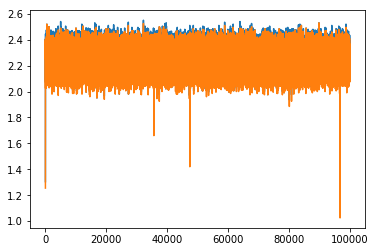

In [3]:
   #Initiate game
import os
import numpy as np
import Tournament as tor
import Games
import Strategies
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = ""
game = Games.PrisonersDilemma('Joshua')
action_space = game.actionSpace

#Initiate players 
#for name, obj in inspect.getmembers(Games):
 #   if inspect.isclass(obj): #and name[-5:] == 'Agent':
  #      print (name)
#list_of_players, arr = tour.initPlayersRand(20, [0.2, 0.4, 0.2, 0.0, 0.2], action_space)
player1 = Strategies.Neural200Agent(name = 'Neural', actionSpace = game.actionSpace)
player2 = Strategies.TitFTatAgent(name = 'TitFTat')
list_of_players = [player1, player2 ]

list_avgScore = []   
for i in range(100000):
    for k in list_of_players:
        if k.name[:7] == 'Neural':
            k.prepThread(len(list_of_players)-1)
    game.tournament(list_of_players, 200,0.04)
    avgScore= []
    for j in list_of_players:
        avgScore.append(np.sum(j.lastScore) / (200 * (len(list_of_players)-1)))
        if j.name == 'Neural' :
            j.train()
        
    list_avgScore.append(avgScore)
    #print('round = %d \naverage score Neural agent = %f \naverage score TitFTat = %f \n' % (i, avgScore[0], avgScore[1]))        
X1 = np.array(list_avgScore)[:,0]
X2 = np.array(list_avgScore)[:,1]
plt.plot(X1)
plt.plot(X2)
plt.show()

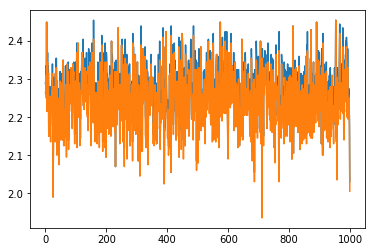

In [2]:
plt.plot(X1)
plt.plot(X2)
plt.show()

In [ ]:
from multiprocessing import Process

p0 = Process(target=train, args=(None,r'/gpu:0', True, 'Morgan','psa',512,2)) 
p1 = Process(target=train, args=(None,r'/gpu:0', True, 'Morgan','psa',512,3))
p2 = Process(target=train, args=(None,r'/gpu:0', True, 'Maccs','psa',512,5))

p3 = Process(target=train, args=(None,r'/gpu:0', True, 'Morgan','alogp',512,2)) 
p4 = Process(target=train, args=(None,r'/gpu:0', True, 'Morgan','alogp',512,3)) 
p5 = Process(target=train, args=(None,r'/gpu:0', True, 'Maccs','alogp',512,5))

os.environ["CUDA_VISIBLE_DEVICES"]="0"
#p0.start()
#p1.start()
p2.start()
os.environ["CUDA_VISIBLE_DEVICES"]="1"
#p3.start()
#p4.start()
#p5.start()


#p0.join()
#p1.join()
p2.join()
#p3.join()
#p4.join()
#p5.join()